In [3]:
import matplotlib.pyplot as plt
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nn.nn import NeuralNetwork
from nn.preprocess import sample_seqs, one_hot_encode_seqs
from nn.io import read_text_file, read_fasta_file

In [ ]:
# Load  Sequences
positive_seqs = read_text_file("data/rap1-lieb-positives.txt")  
negative_seqs = read_fasta_file("data/yeast-upstream-1k-negative.fa")  


In [ ]:
seq_length = len(positive_seqs[0])
negative_windows = []
for seq in negative_seqs:
    # Generate all possible subsequences of length `seq_length`
    for i in range(len(seq) - seq_length + 1): 
        negative_windows.append(seq[i : i + seq_length])

all_seqs = positive_seqs + negative_windows  # Combine sequences
all_labels = [True] * len(positive_seqs) + [False] * len(negative_seqs) 

# Balance the dataset
balanced_seqs, balanced_labels = sample_seqs(all_seqs, all_labels)  



In [24]:
# One-Hot Encode Sequences
X = one_hot_encode_seqs(balanced_seqs)
y = np.array(balanced_labels).reshape(-1, 1)  

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Transpose for neural network input (features, samples)
X_train, X_val = X_train.T, X_val.T
y_train, y_val = y_train.T, y_val.T


In [33]:
nn_arch = [
    {"input_dim": X_train.shape[0], "output_dim": 32, "activation": "relu"},
    {"input_dim": 32, "output_dim": 16, "activation": "relu"},
    {"input_dim": 16, "output_dim": 1, "activation": "sigmoid"}  # Binary classification
]

classifier = NeuralNetwork(
    nn_arch=nn_arch,
    lr=0.01,
    seed=42,
    batch_size=128,
    epochs=1500,
    loss_function='binary_cross_entropy'
)

train_loss, val_loss = classifier.fit(X_train, y_train, X_val, y_val)


Epoch 0: Train Loss = 0.6899, Val Loss = 0.6899
Epoch 10: Train Loss = 0.6893, Val Loss = 0.6893
Epoch 20: Train Loss = 0.6886, Val Loss = 0.6886
Epoch 30: Train Loss = 0.6880, Val Loss = 0.6880
Epoch 40: Train Loss = 0.6873, Val Loss = 0.6873
Epoch 50: Train Loss = 0.6866, Val Loss = 0.6866
Epoch 60: Train Loss = 0.6859, Val Loss = 0.6859
Epoch 70: Train Loss = 0.6852, Val Loss = 0.6851
Epoch 80: Train Loss = 0.6844, Val Loss = 0.6843
Epoch 90: Train Loss = 0.6836, Val Loss = 0.6835
Epoch 100: Train Loss = 0.6828, Val Loss = 0.6827
Epoch 110: Train Loss = 0.6819, Val Loss = 0.6818
Epoch 120: Train Loss = 0.6810, Val Loss = 0.6809
Epoch 130: Train Loss = 0.6801, Val Loss = 0.6799
Epoch 140: Train Loss = 0.6791, Val Loss = 0.6789
Epoch 150: Train Loss = 0.6780, Val Loss = 0.6778
Epoch 160: Train Loss = 0.6769, Val Loss = 0.6767
Epoch 170: Train Loss = 0.6757, Val Loss = 0.6755
Epoch 180: Train Loss = 0.6744, Val Loss = 0.6742
Epoch 190: Train Loss = 0.6731, Val Loss = 0.6728
Epoch 200: 

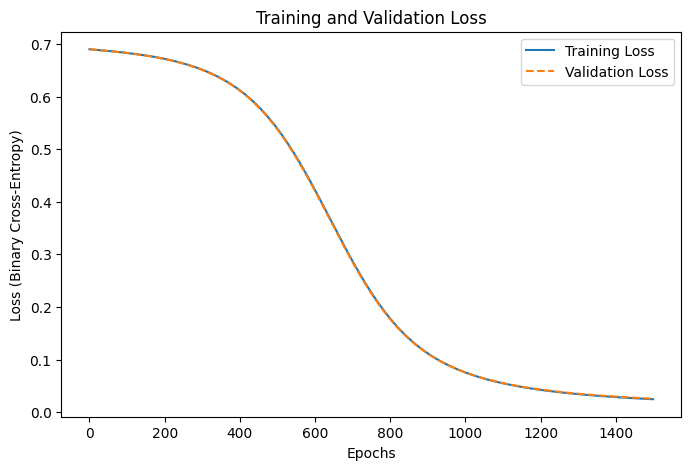

In [34]:
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss", linestyle="dashed")
plt.xlabel("Epochs")
plt.ylabel("Loss (Binary Cross-Entropy)")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [27]:
y_pred = classifier.predict(X_val) >= 0.5  # Convert probabilities to binary labels
accuracy = accuracy_score(y_val.flatten(), y_pred.flatten())
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.9945


 I chose lr = 0.01 because smaller values failed to reach a stable loss even after 5500 epochs, while this learning rate allowed efficient convergence without instability. I set the batch size to 128 as it significantly sped up training while achieving the same final training loss 0.026, which indicates strong reconstruction performance. For the loss function, I selected binary cross-entropy because it is best for binary classification tasks.  These choices ensure an optimal balance between training speed, stability, and accuracy.